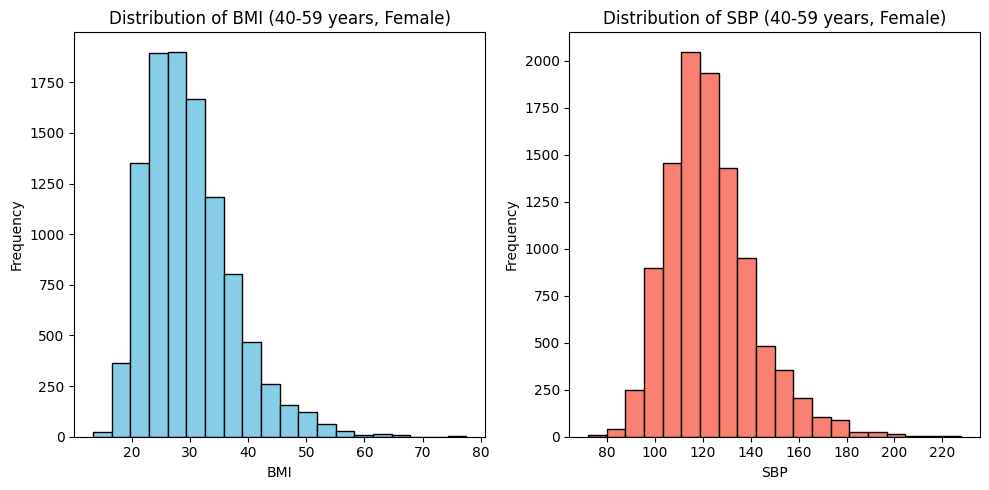

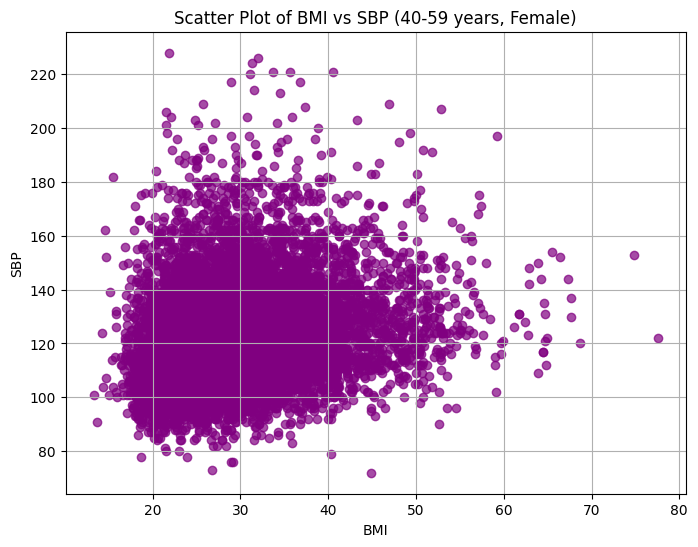

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, invwishart, dirichlet
from tqdm import tqdm
from Samplers.gibbs_sampler import *
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('data/NHANES_adults_data_preprocessed.csv')
filtered_data = data[(data['sex'] == 2) & (data['age'] >= 40) & (data['age'] < 60)]
filtered_data = data[(data['sex'] == 2) & (data['age'] >= 40) & (data['age'] < 60)]
cleaned_data = filtered_data[
    (filtered_data['bmi'] >= 10) & (filtered_data['bmi'] <= 80) &
    (filtered_data['sbp'] >= 70) & (filtered_data['sbp'] <= 270)
]
bmi_sbp_data = cleaned_data[['bmi', 'sbp']]

# Plot BMI and SBP distributions
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(bmi_sbp_data['bmi'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of BMI (40-59 years, Female)')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(bmi_sbp_data['sbp'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of SBP (40-59 years, Female)')
plt.xlabel('SBP')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Scatter plot between BMI and SBP
plt.figure(figsize=(8, 6))
plt.scatter(bmi_sbp_data['bmi'], bmi_sbp_data['sbp'], alpha=0.7, color='purple')
plt.title('Scatter Plot of BMI vs SBP (40-59 years, Female)')
plt.xlabel('BMI')
plt.ylabel('SBP')
plt.grid()
plt.show()

# Display filtered data summary
bmi_sbp_summary = bmi_sbp_data.describe()
bmi_sbp_summary

mean_bmi = bmi_sbp_data['bmi'].mean()
mean_sbp = bmi_sbp_data['sbp'].mean()
std_bmi = bmi_sbp_data['bmi'].std()
std_sbp = bmi_sbp_data['sbp'].std()
bmi_sbp_data.loc[:, 'bmi'] = (bmi_sbp_data['bmi'] - mean_bmi) / std_bmi
bmi_sbp_data.loc[:, 'sbp'] = (bmi_sbp_data['sbp'] - mean_sbp) / std_sbp
bmi_bounds = (np.array([18, 25, 30, np.inf])-mean_bmi)/std_bmi
sbp_bounds = (np.array([140, 160, np.inf])-mean_sbp)/std_sbp

Running Gibbs Sampler for Run 1


Sampling: 100%|██████████| 5000/5000 [05:44<00:00, 14.50it/s]


Running Gibbs Sampler for Run 2


Sampling: 100%|██████████| 5000/5000 [05:47<00:00, 14.38it/s]


Running Gibbs Sampler for Run 3


Sampling: 100%|██████████| 5000/5000 [06:01<00:00, 13.84it/s]


Running Gibbs Sampler for Run 4


Sampling: 100%|██████████| 5000/5000 [05:50<00:00, 14.27it/s]


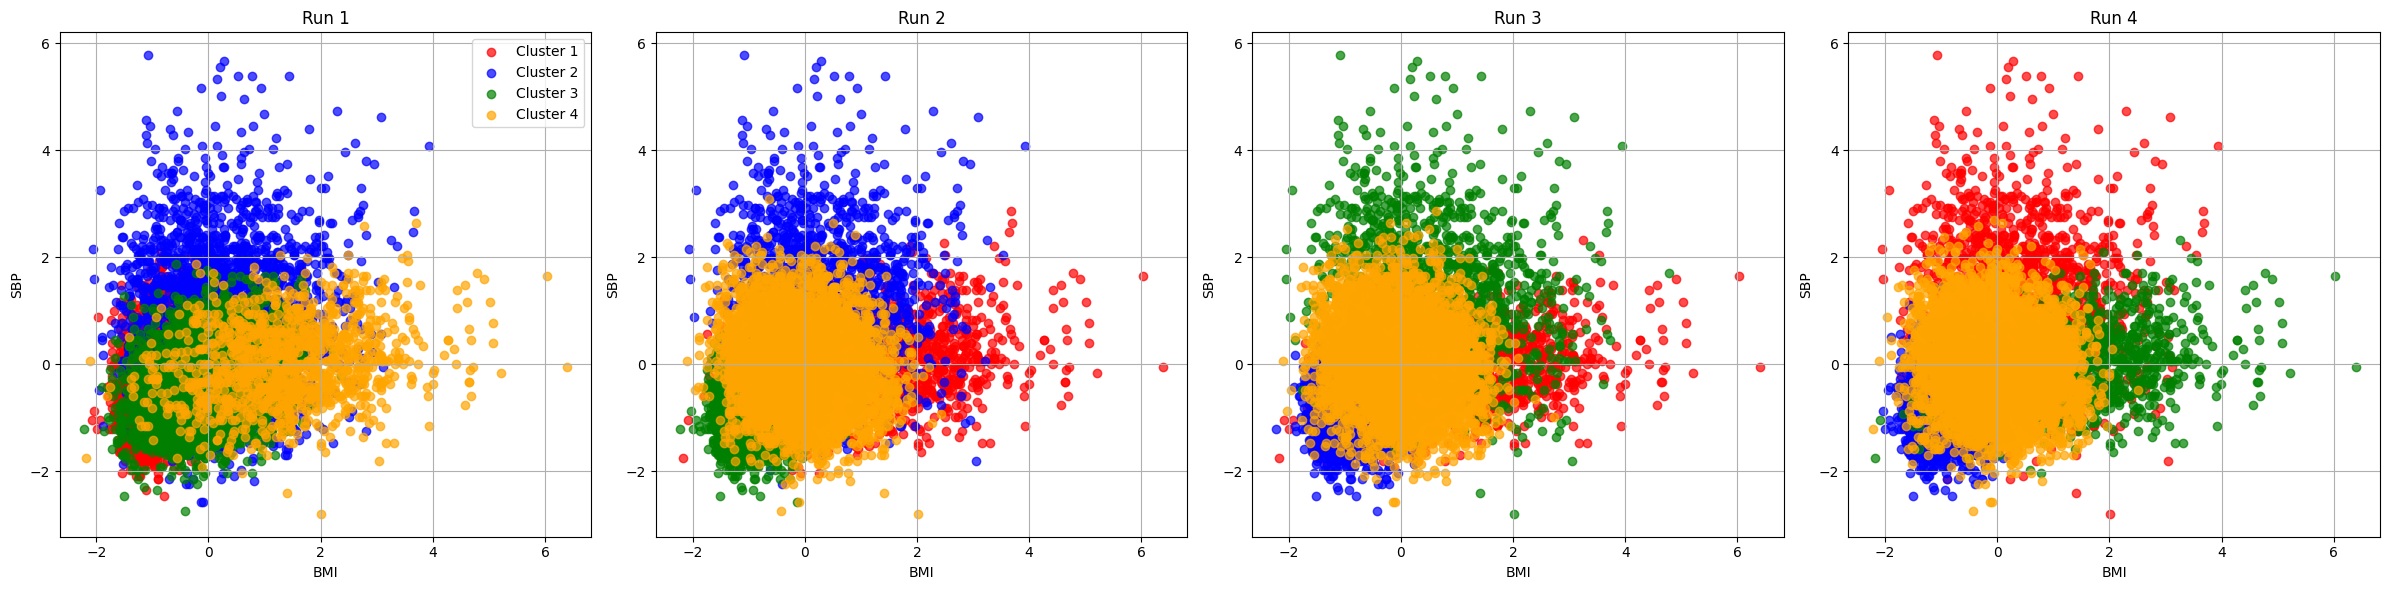

--- Run 1 ---
Mixing Proportions (pi):
  Cluster 1: Mean = 0.2643
  Cluster 2: Mean = 0.1860
  Cluster 3: Mean = 0.4291
  Cluster 4: Mean = 0.1206
Means (mu, Dimension 1):
  Cluster 1: Mean = -0.8482
  Cluster 2: Mean = 0.2916
  Cluster 3: Mean = 0.0081
  Cluster 4: Mean = 1.3965
Means (mu, Dimension 2):
  Cluster 1: Mean = -0.2411
  Cluster 2: Mean = 1.1271
  Cluster 3: Mean = -0.3060
  Cluster 4: Mean = -0.1126
Variances (sigma², Dimension 1):
  Cluster 1: Mean = 0.1492
  Cluster 2: Mean = 0.8896
  Cluster 3: Mean = 0.4211
  Cluster 4: Mean = 1.4471
Variances (sigma², Dimension 2):
  Cluster 1: Mean = 0.6187
  Cluster 2: Mean = 1.4835
  Cluster 3: Mean = 0.4600
  Cluster 4: Mean = 0.5731
--- Run 2 ---
Mixing Proportions (pi):
  Cluster 1: Mean = 0.1155
  Cluster 2: Mean = 0.1269
  Cluster 3: Mean = 0.2577
  Cluster 4: Mean = 0.4999
Means (mu, Dimension 1):
  Cluster 1: Mean = 1.3746
  Cluster 2: Mean = 0.4987
  Cluster 3: Mean = -0.8115
  Cluster 4: Mean = -0.0232
Means (mu, Dimensio

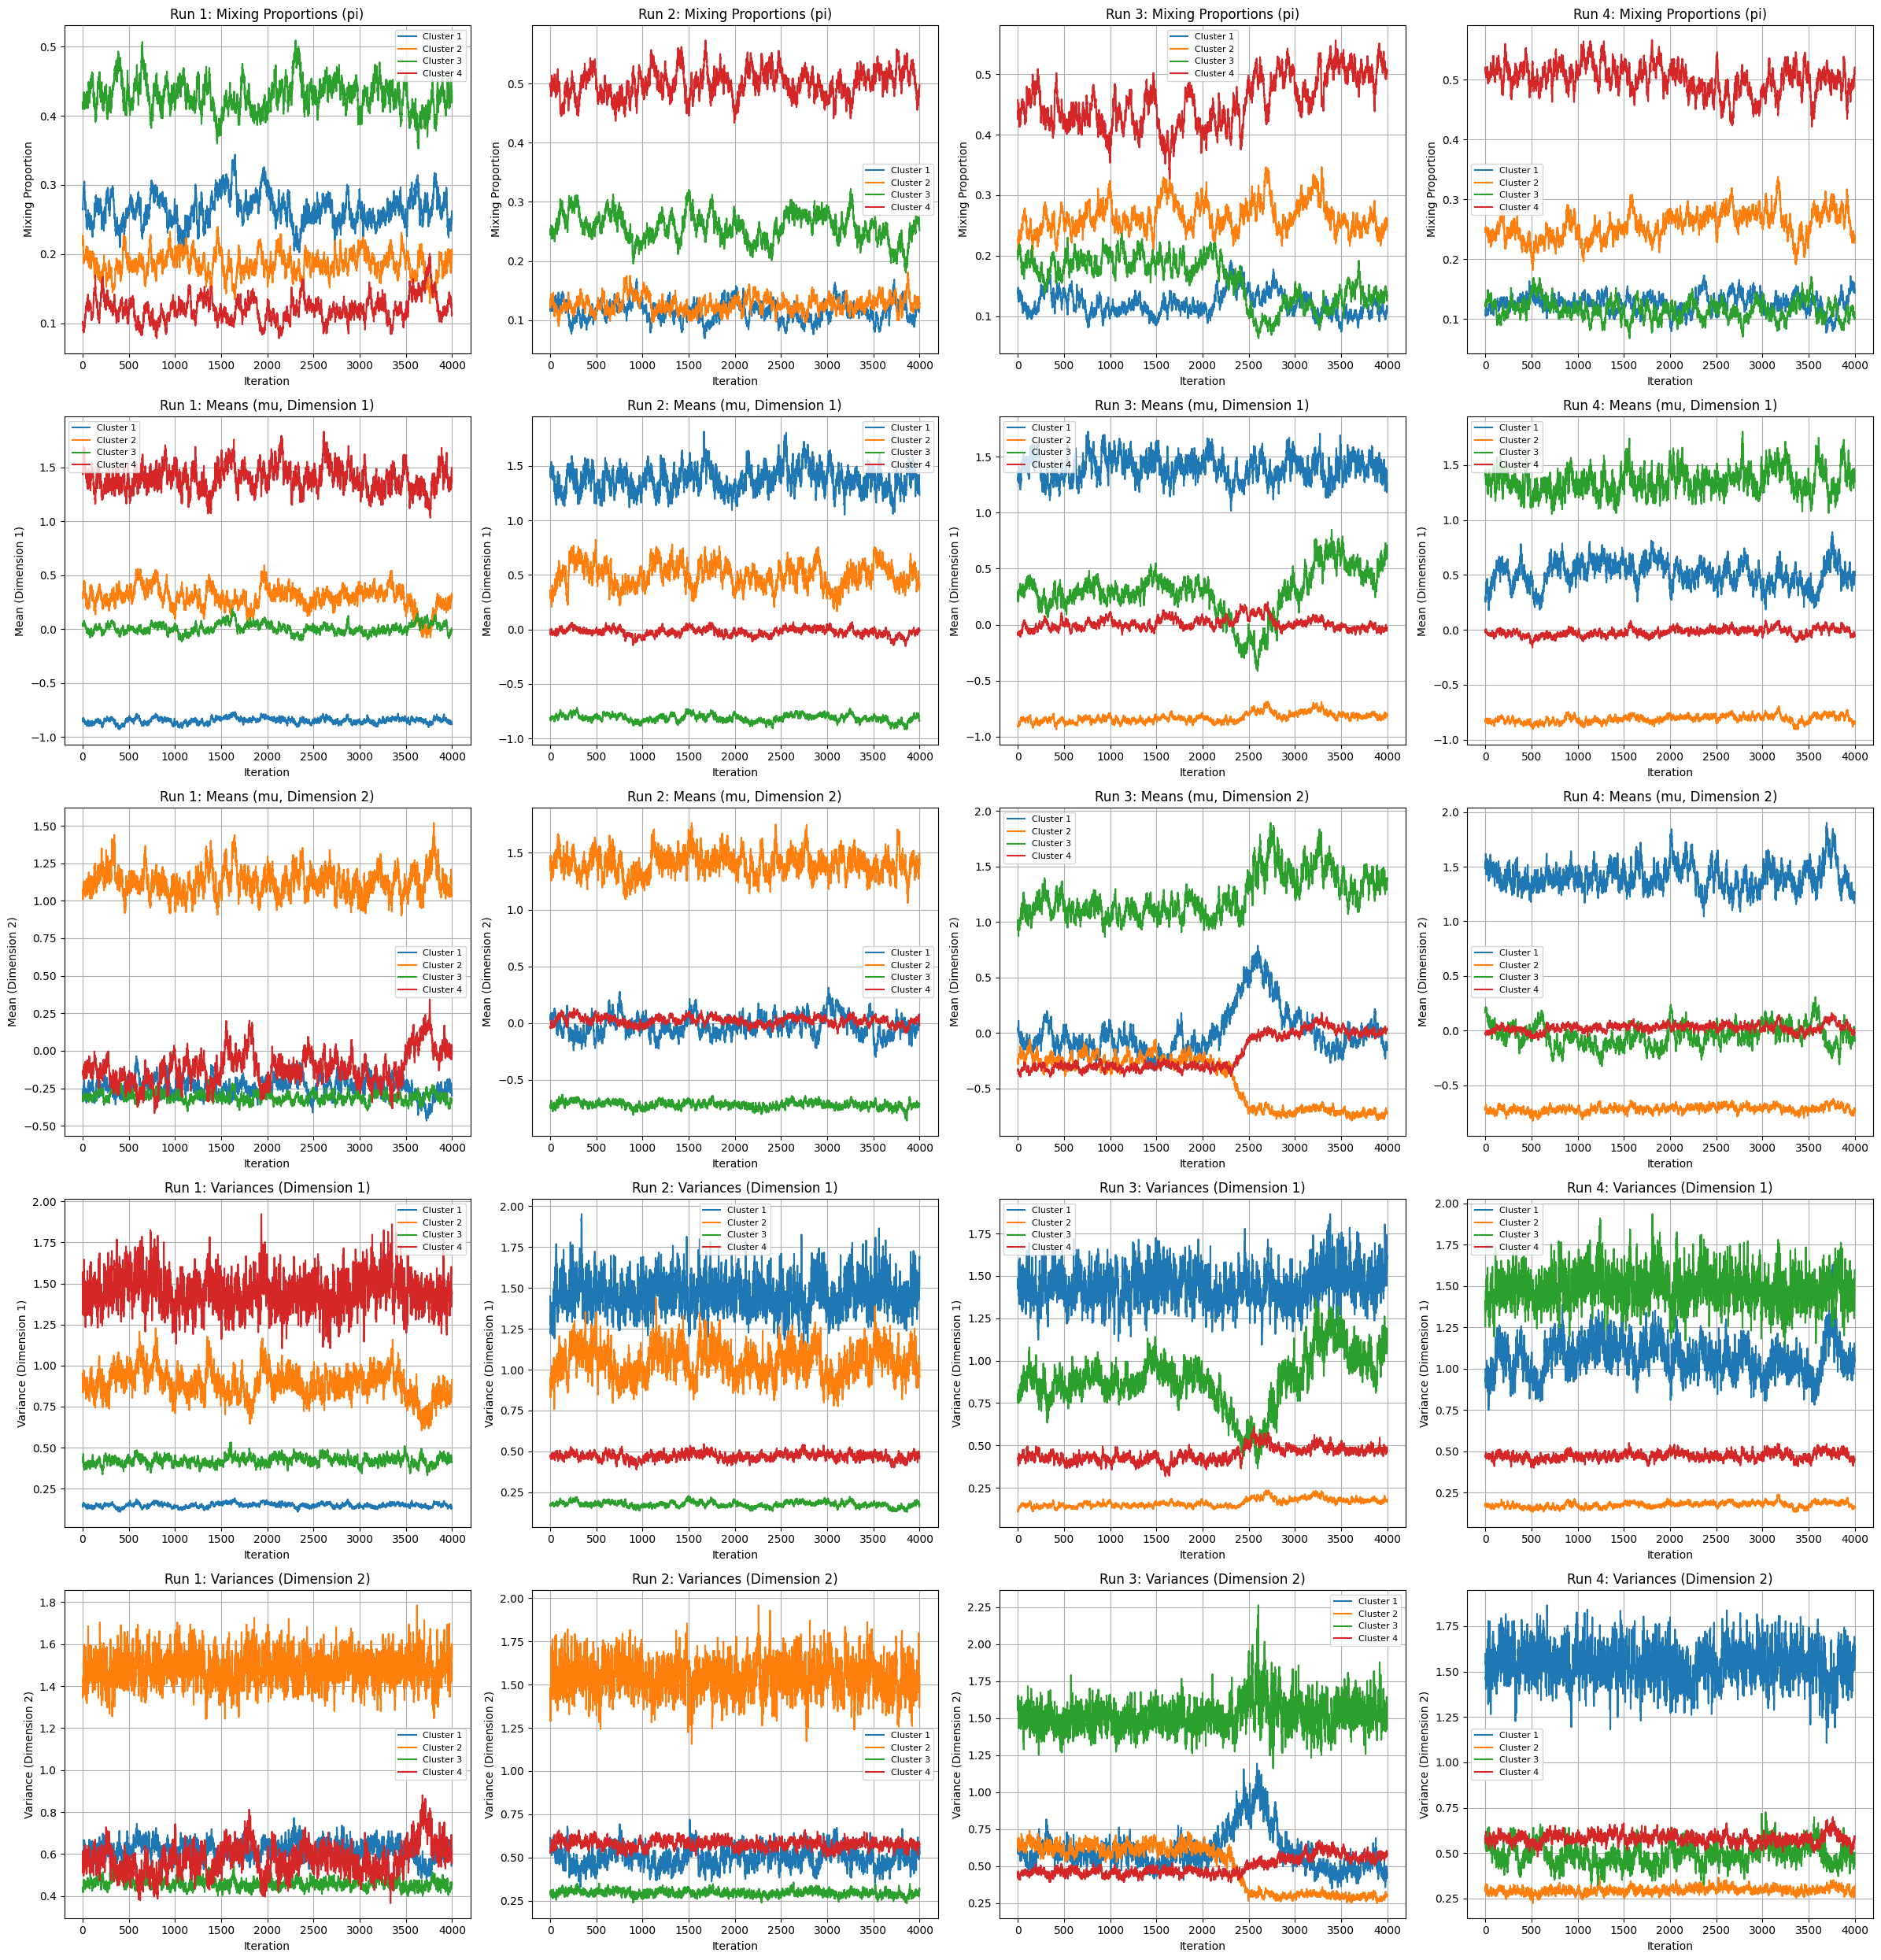

In [2]:
#set seed
np.random.seed(42)
# Parameters
num_runs = 4
num_iterations = 5000
K = 4  # Number of clusters
X = bmi_sbp_data[['bmi', 'sbp']].to_numpy()

# Store all iterations for each run
all_run_samples = []

# Run the Gibbs sampler multiple times
for run in range(num_runs):
    print(f"Running Gibbs Sampler for Run {run + 1}")
    run_samples = gibbs_sampler_gmm_multivariate(X,K, num_iterations)
    all_run_samples.append(run_samples)

# Plot scatter graphs with last iteration results
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'cyan', 'magenta']
fig, axes = plt.subplots(1, num_runs, figsize=(6 * num_runs, 6))

if num_runs == 1:
    axes = [axes] 

for run, ax in enumerate(axes):
    last_sample = all_run_samples[run][-1]  # Get the last iteration for the current run
    _, _, _, z = last_sample  # Extract z (cluster assignments)
    for k in range(K):
        ax.scatter(
            X[np.array(z) == k, 0],
            X[np.array(z) == k, 1],
            alpha=0.7,
            color=colors[k],
            label=f"Cluster {k + 1}" if run == 0 else None,
        )
    ax.set_title(f"Run {run + 1}")
    ax.set_xlabel("BMI")
    ax.set_ylabel("SBP")
    ax.grid()

axes[0].legend(loc="upper right")
plt.tight_layout()
plt.show()

# --- Trace Plots for Multiple Runs ---
fig, axes = plt.subplots(5, num_runs, figsize=(6 * num_runs, 25))  # Adjust rows for pi, mu, and sigma

for run in range(num_runs):
    run_samples = all_run_samples[run]
    pi_samples = np.array([s[0] for s in run_samples])  # Mixing proportions
    mu_samples = np.array([s[1] for s in run_samples])  # Means
    sigma_samples = np.array([s[2] for s in run_samples])  # Covariances

    print(f"--- Run {run + 1} ---")
    
    # --- First Row: Trace Plots for Mixing Proportions (pi) ---
    print("Mixing Proportions (pi):")
    for k in range(K):
        mean_pi = np.mean(pi_samples[:, k])
        print(f"  Cluster {k + 1}: Mean = {mean_pi:.4f}")
        axes[0, run].plot(pi_samples[:, k], label=f'Cluster {k + 1}')
    axes[0, run].set_title(f"Run {run + 1}: Mixing Proportions (pi)")
    axes[0, run].set_xlabel("Iteration")
    axes[0, run].set_ylabel("Mixing Proportion")
    axes[0, run].legend(fontsize=8)
    axes[0, run].grid()

    # --- Second Row: Trace Plots for Means (mu, Dimension 1) ---
    print("Means (mu, Dimension 1):")
    for k in range(K):
        mean_mu_dim1 = np.mean(mu_samples[:, k, 0])
        print(f"  Cluster {k + 1}: Mean = {mean_mu_dim1:.4f}")
        axes[1, run].plot(mu_samples[:, k, 0], label=f'Cluster {k + 1}')
    axes[1, run].set_title(f"Run {run + 1}: Means (mu, Dimension 1)")
    axes[1, run].set_xlabel("Iteration")
    axes[1, run].set_ylabel("Mean (Dimension 1)")
    axes[1, run].legend(fontsize=8)
    axes[1, run].grid()

    # --- Third Row: Trace Plots for Means (mu, Dimension 2) ---
    print("Means (mu, Dimension 2):")
    for k in range(K):
        mean_mu_dim2 = np.mean(mu_samples[:, k, 1])
        print(f"  Cluster {k + 1}: Mean = {mean_mu_dim2:.4f}")
        axes[2, run].plot(mu_samples[:, k, 1], label=f'Cluster {k + 1}')
    axes[2, run].set_title(f"Run {run + 1}: Means (mu, Dimension 2)")
    axes[2, run].set_xlabel("Iteration")
    axes[2, run].set_ylabel("Mean (Dimension 2)")
    axes[2, run].legend(fontsize=8)
    axes[2, run].grid()

    # --- Fourth Row: Trace Plots for Variances (sigma², Dimension 1) ---
    print("Variances (sigma², Dimension 1):")
    for k in range(K):
        variances_dim1 = [sigma_samples[i, k, 0, 0] for i in range(len(sigma_samples))]
        mean_sigma_dim1 = np.mean(variances_dim1)
        print(f"  Cluster {k + 1}: Mean = {mean_sigma_dim1:.4f}")
        axes[3, run].plot(variances_dim1, label=f'Cluster {k + 1}')
    axes[3, run].set_title(f"Run {run + 1}: Variances (Dimension 1)")
    axes[3, run].set_xlabel("Iteration")
    axes[3, run].set_ylabel("Variance (Dimension 1)")
    axes[3, run].legend(fontsize=8)
    axes[3, run].grid()

    # --- Fifth Row: Trace Plots for Variances (sigma², Dimension 2) ---
    print("Variances (sigma², Dimension 2):")
    for k in range(K):
        variances_dim2 = [sigma_samples[i, k, 1, 1] for i in range(len(sigma_samples))]
        mean_sigma_dim2 = np.mean(variances_dim2)
        print(f"  Cluster {k + 1}: Mean = {mean_sigma_dim2:.4f}")
        axes[4, run].plot(variances_dim2, label=f'Cluster {k + 1}')
    axes[4, run].set_title(f"Run {run + 1}: Variances (Dimension 2)")
    axes[4, run].set_xlabel("Iteration")
    axes[4, run].set_ylabel("Variance (Dimension 2)")
    axes[4, run].legend(fontsize=8)
    axes[4, run].grid()

plt.tight_layout()
plt.show()

In [3]:
def plot_with_reference_lines(mu_samples, sigma_samples, bmi_bounds, sbp_bounds, ax):
    """
    Plots clusters with posterior mean and variance, and adds reference lines for h2.
    """
    posterior_mu = np.mean(mu_samples, axis=0)
    posterior_sigma = np.mean(sigma_samples, axis=0)

    # # Scatter data points
    ax.scatter(bmi_sbp_data['bmi'], bmi_sbp_data['sbp'], alpha=0.7, color='grey', label='Data Points')

    # Plot each cluster's posterior mean and confidence ellipse
    for k in range(len(posterior_mu)):
        # Plot the posterior mean of the cluster
        ax.scatter(
            posterior_mu[k, 0],
            posterior_mu[k, 1],
            color='black',
            s=100,
            label=f"Cluster {k + 1} Mean" if k == 0 else None,
            marker='x'
        )

        # Add confidence ellipses for different standard deviations
        cov_matrix = posterior_sigma[k]
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))

        for scale in [0.25,0.5,0.75,1.0]:
            width, height = 2 * scale * np.sqrt(eigenvalues)  # Scale by standard deviation level
            ellipse = patches.Ellipse(
                posterior_mu[k], width, height, angle=angle, alpha = 0.5,
                edgecolor='black', facecolor='none'
            )
            ax.add_patch(ellipse)
            
    # Add BMI and SBP reference lines
    for bmi_bound in bmi_bounds:
        ax.axvline(x=bmi_bound, color='red', linestyle='--', linewidth=1, label='BMI Boundaries' if bmi_bound == bmi_bounds[0] else None)

    for sbp_bound in sbp_bounds:
        ax.axhline(y=sbp_bound, color='blue', linestyle='--', linewidth=1, label='SBP Boundaries' if sbp_bound == sbp_bounds[0] else None)

    ax.set_xlabel("BMI")
    ax.set_ylabel("SBP")
    ax.grid()
    ax.legend()

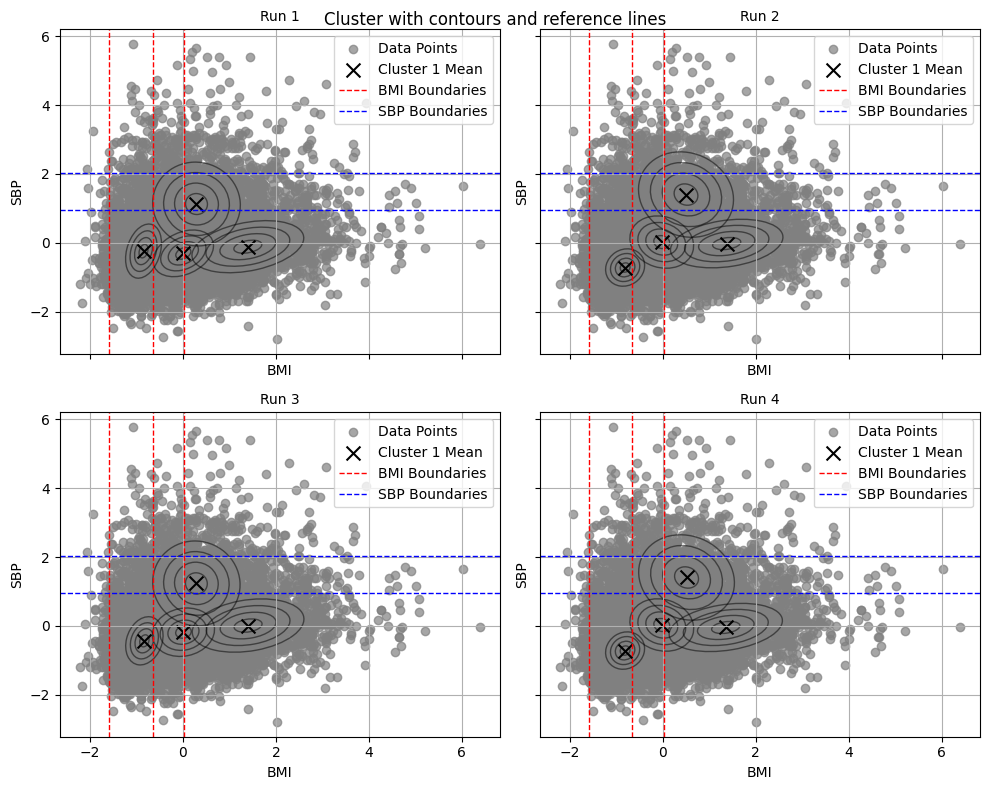

In [4]:
cols = 2  # Number of columns in the subplot grid
rows = (num_runs + cols - 1) // cols  # Calculate the required number of rows
fig, axes = plt.subplots(rows, cols, figsize=(10, 4 * rows), sharex=True, sharey=True)
axes = np.array(axes).flatten() 


for run, (ax, run_samples) in enumerate(zip(axes, all_run_samples)):
    mu_samples = np.array([s[1] for s in run_samples])  # Means
    sigma_samples = np.array([s[2] for s in run_samples])  # Covariances

    plot_with_reference_lines(mu_samples, sigma_samples, bmi_bounds, sbp_bounds, ax)
    ax.set_title(f"Run {run + 1}", fontsize=10)

plt.tight_layout()
plt.suptitle("Cluster with contours and reference lines")
plt.show()

In [5]:

# Parameters
num_runs = 2
num_iterations = 5000
K = 4  # Number of clusters
X = bmi_sbp_data[['bmi', 'sbp']].to_numpy()


# Store all iterations for each run
all_run_samples = []

for run in range(num_runs):
    print(f"Running Gibbs Sampler for Run {run + 1}")
    h = h1 if run == 0 else h2  # Use h1 for run 1 and h2 for run 2
    run_samples = bayesian_repulsive(X, K, num_iterations, h)  # Run the sampler with the chosen h
    all_run_samples.append(run_samples)  # Store all iterations for the current run

# Plot results for the last iteration of each run
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'cyan', 'magenta']
fig, axes = plt.subplots(1, num_runs, figsize=(20, 5), sharex=True, sharey=True)

for run, ax in enumerate(axes):
    last_sample = all_run_samples[run][-1]  # Get the last iteration for the current run
    _, _, _, z = last_sample  # Extract z (cluster assignments)
    for k in range(K):
        ax.scatter(
            X[np.array(z) == k, 0],
            X[np.array(z) == k, 1],
            alpha=0.7,
            color=colors[k],
            label=f"Cluster {k+1}" if run == 0 else None,  # Only label in the first plot
        )
    ax.set_title(f"Run {run + 1} (h = {'h1' if run == 0 else 'h2'})")
    ax.set_xlabel("BMI")
    ax.set_ylabel("SBP")
    ax.grid()

axes[0].legend(loc="upper right")
plt.tight_layout()
plt.show()

# --- Trace Plots for Multiple Runs ---
fig, axes = plt.subplots(3, num_runs, figsize=(20, 12))  # 3 rows (pi, mu, sigma²), num_runs columns

# Plot for each run
for run in range(num_runs):
    run_samples = all_run_samples[run]
    pi_samples = np.array([s[0] for s in run_samples])  # Mixing proportions
    mu_samples = np.array([s[1] for s in run_samples])  # Means
    sigma_samples = np.array([s[2] for s in run_samples])  # Covariances

    # --- First Row: Trace Plots for Mixing Proportions (pi) ---
    for k in range(K):
        axes[0, run].plot(pi_samples[:, k], label=f'Cluster {k + 1}')
        axes[0, run].text(len(pi_samples), np.mean(pi_samples[:, k]), f"Mean: {np.mean(pi_samples[:, k]):.2f}", color='red')
    axes[0, run].set_title(f"Run {run + 1}: Mixing Proportions (pi)")
    axes[0, run].set_xlabel("Iteration")
    axes[0, run].set_ylabel("Mixing Proportion")
    axes[0, run].legend(fontsize=8)
    axes[0, run].grid()

    # --- Second Row: Trace Plots for Means (mu, Dimension 1) ---
    for k in range(K):
        axes[1, run].plot(mu_samples[:, k, 0], label=f'Cluster {k + 1}')  # Only plot Dimension 1
        axes[1, run].text(len(mu_samples), np.mean(mu_samples[:, k, 0]), f"Mean: {np.mean(mu_samples[:, k, 0]):.2f}", color='red')
    axes[1, run].set_title(f"Run {run + 1}: Means (mu, Dimension 1)")
    axes[1, run].set_xlabel("Iteration")
    axes[1, run].set_ylabel("Mean Value")
    axes[1, run].legend(fontsize=8)
    axes[1, run].grid()

    # --- Third Row: Trace Plots for Variances (sigma², Dimension 1) ---
    for k in range(K):
        variances = [sigma_samples[i, k, 0, 0] for i in range(len(sigma_samples))]  # Variance of Dimension 1
        axes[2, run].plot(variances, label=f'Cluster {k + 1}')
        axes[2, run].text(len(variances), np.mean(variances), f"Mean: {np.mean(variances):.2f}", color='red')
    axes[2, run].set_title(f"Run {run + 1}: Variances (sigma², Dimension 1)")
    axes[2, run].set_xlabel("Iteration")
    axes[2, run].set_ylabel("Variance Value")
    axes[2, run].legend(fontsize=8)
    axes[2, run].grid()

# Adjust layout for clarity
plt.tight_layout()
plt.show()

Running Gibbs Sampler for Run 1


NameError: name 'h1' is not defined

In [ ]:

# Plot the mean and variance (as ellipses) for each run
for run, run_samples in enumerate(all_run_samples):
    last_sample = run_samples[-1]
    pi, mu, sigma, z = last_sample  # Extract parameters from the last iteration

    plt.figure(figsize=(10, 7))
    plt.title(f"Run {run + 1}: Clusters with Mean and Variance")
    plt.xlabel("BMI")
    plt.ylabel("SBP")

    # Scatter the data points
    for k in range(K):
        cluster_points = X[np.array(z) == k]
        # plt.scatter(cluster_points[:, 0], cluster_points[:, 1], alpha=0.4, label=f"Cluster {k + 1} Data")

        # Plot the mean of the cluster
        plt.scatter(mu[k, 0], mu[k, 1], color='black', s=100, label=f"Cluster {k + 1} Mean", marker='x')

        # Add confidence ellipse for the cluster
        cov_matrix = sigma[k]
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        angle = np.arctan2(*eigenvectors[:, 0][::-1])
        width, height = 2 * np.sqrt(eigenvalues)  # 1 SD ellipse
        ellipse = patches.Ellipse(
            mu[k], width, height, angle=np.degrees(angle), edgecolor='black', facecolor='none', linestyle='--'
        )
        plt.gca().add_patch(ellipse)

    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
from Samplers.gibbs_sampler import *
# Parameters
num_runs = 2
num_iterations = 5000
K = 4  # Number of clusters
X = bmi_sbp_data[['bmi', 'sbp']].to_numpy()


# Store all iterations for each run
all_run_samples = []

for run in range(num_runs):
    print(f"Running Gibbs Sampler for Run {run + 1}")
    h = h1 if run == 0 else h2  # Use h1 for run 1 and h2 for run 2
    run_samples = bayesian_repulsive_with_variance_constraint(X, K, num_iterations, h)  # Run the sampler with the chosen h
    all_run_samples.append(run_samples)  # Store all iterations for the current run

# Plot results for the last iteration of each run
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'cyan', 'magenta']
fig, axes = plt.subplots(1, num_runs, figsize=(20, 5), sharex=True, sharey=True)

for run, ax in enumerate(axes):
    last_sample = all_run_samples[run][-1]  # Get the last iteration for the current run
    _, _, _, z = last_sample  # Extract z (cluster assignments)
    for k in range(K):
        ax.scatter(
            X[np.array(z) == k, 0],
            X[np.array(z) == k, 1],
            alpha=0.7,
            color=colors[k],
            label=f"Cluster {k+1}" if run == 0 else None,  # Only label in the first plot
        )
    ax.set_title(f"Run {run + 1} (h = {'h1' if run == 0 else 'h2'})")
    ax.set_xlabel("BMI")
    ax.set_ylabel("SBP")
    ax.grid()

axes[0].legend(loc="upper right")
plt.tight_layout()
plt.show()

# --- Trace Plots for Multiple Runs ---
fig, axes = plt.subplots(3, num_runs, figsize=(20, 12))  # 3 rows (pi, mu, sigma²), num_runs columns

# Plot for each run
for run in range(num_runs):
    run_samples = all_run_samples[run]
    pi_samples = np.array([s[0] for s in run_samples])  # Mixing proportions
    mu_samples = np.array([s[1] for s in run_samples])  # Means
    sigma_samples = np.array([s[2] for s in run_samples])  # Covariances

    # --- First Row: Trace Plots for Mixing Proportions (pi) ---
    for k in range(K):
        axes[0, run].plot(pi_samples[:, k], label=f'Cluster {k + 1}')
        axes[0, run].text(len(pi_samples), np.mean(pi_samples[:, k]), f"Mean: {np.mean(pi_samples[:, k]):.2f}", color='red')
    axes[0, run].set_title(f"Run {run + 1}: Mixing Proportions (pi)")
    axes[0, run].set_xlabel("Iteration")
    axes[0, run].set_ylabel("Mixing Proportion")
    axes[0, run].legend(fontsize=8)
    axes[0, run].grid()

    # --- Second Row: Trace Plots for Means (mu, Dimension 1) ---
    for k in range(K):
        axes[1, run].plot(mu_samples[:, k, 0], label=f'Cluster {k + 1}')  # Only plot Dimension 1
        axes[1, run].text(len(mu_samples), np.mean(mu_samples[:, k, 0]), f"Mean: {np.mean(mu_samples[:, k, 0]):.2f}", color='red')
    axes[1, run].set_title(f"Run {run + 1}: Means (mu, Dimension 1)")
    axes[1, run].set_xlabel("Iteration")
    axes[1, run].set_ylabel("Mean Value")
    axes[1, run].legend(fontsize=8)
    axes[1, run].grid()

    # --- Third Row: Trace Plots for Variances (sigma², Dimension 1) ---
    for k in range(K):
        variances = [sigma_samples[i, k, 0, 0] for i in range(len(sigma_samples))]  # Variance of Dimension 1
        axes[2, run].plot(variances, label=f'Cluster {k + 1}')
        axes[2, run].text(len(variances), np.mean(variances), f"Mean: {np.mean(variances):.2f}", color='red')
    axes[2, run].set_title(f"Run {run + 1}: Variances (sigma², Dimension 1)")
    axes[2, run].set_xlabel("Iteration")
    axes[2, run].set_ylabel("Variance Value")
    axes[2, run].legend(fontsize=8)
    axes[2, run].grid()

# Adjust layout for clarity
plt.tight_layout()
plt.show()

In [ ]:

# Plot the mean and variance (as ellipses) for each run
for run, run_samples in enumerate(all_run_samples):
    last_sample = run_samples[-1]
    pi, mu, sigma, z = last_sample  # Extract parameters from the last iteration

    plt.figure(figsize=(10, 7))
    plt.title(f"Run {run + 1}: Clusters with Mean and Variance")
    plt.xlabel("BMI")
    plt.ylabel("SBP")

    # Scatter the data points
    for k in range(K):
        cluster_points = X[np.array(z) == k]
        # plt.scatter(cluster_points[:, 0], cluster_points[:, 1], alpha=0.4, label=f"Cluster {k + 1} Data")

        # Plot the mean of the cluster
        plt.scatter(mu[k, 0], mu[k, 1], color='black', s=100, label=f"Cluster {k + 1} Mean", marker='x')

        # Add confidence ellipse for the cluster
        cov_matrix = sigma[k]
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        angle = np.arctan2(*eigenvectors[:, 0][::-1])
        width, height = 2 * np.sqrt(eigenvalues)  # 1 SD ellipse
        ellipse = patches.Ellipse(
            mu[k], width, height, angle=np.degrees(angle), edgecolor='black', facecolor='none', linestyle='--'
        )
        plt.gca().add_patch(ellipse)

    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
# Generate the contour plot
for run, run_samples in enumerate(all_run_samples):
    last_sample = run_samples[-1]
    pi, mu, sigma, z = last_sample  # Extract parameters from the last iteration

    plt.figure(figsize=(10, 7))
    plt.title(f"Run {run + 1}: Contour Plot for Clusters")
    plt.xlabel("BMI")
    plt.ylabel("SBP")

    # Ensure z is properly aligned with X
    z = np.array(z)
    if len(z) != len(X):
        raise ValueError(f"Size mismatch: len(z)={len(z)} and len(X)={len(X)}")

    # Scatter the data points
    for k in range(K):
        cluster_points = X[z == k]  # Correct indexing
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], alpha=0.4, label=f"Cluster {k + 1} Data")

        # Define the grid for the contour
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        x, y = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        pos = np.dstack((x, y))

        # Multivariate Gaussian PDF for the cluster
        rv = multivariate_normal(mean=mu[k], cov=sigma[k])
        pdf_values = rv.pdf(pos)

        # Plot the contour
        plt.contour(x, y, pdf_values, levels=5, alpha=0.8, colors='black')

    plt.legend()
    plt.grid()
    plt.show()